In [1]:
import sys
import numpy as np
sys.path.append("..")
from fireballpy import Fireball
from ase import Atoms
from ase.visualize import view
from ase.md.verlet import VelocityVerlet
from ase.geometry import distance
from ase.units import fs
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
import matplotlib.pyplot as plt

atoms = Atoms(symbols=['C', 'H', 'H', 'H', 'H'],
            positions=[( 0.0000, 0.0000, 0.0000),
                       ( -0.6533, -0.6533, -0.6533),
                       (-0.6533, 0.6533, 0.6533),
                       ( 0.6533, -0.6533, 0.6533),
                       ( 0.6533, 0.6533, -0.6533)])
print(fs)

0.09822694788464063


In [2]:
atoms.calc = Fireball(charges_method='mdp', options='molecule')
MaxwellBoltzmannDistribution(atoms, temperature_K=300)
dyn = VelocityVerlet(atoms, trajectory='dinamic.traj', 
                     logfile='dinamic.log', timestep=0.2 * fs)
dyn.run(1000)  # take 1000 steps
print(dyn.get_number_of_steps())

/home/dani/fireballpy/examples/../fireballpy/fireball.py:234: UserWarning: Energies not computed. Computing energies
  warnings.warn(


1000


In [3]:
from ase.io.trajectory import Trajectory
traj = Trajectory('dinamic.traj')

Text(0, 0.5, 'Energy (eV)')

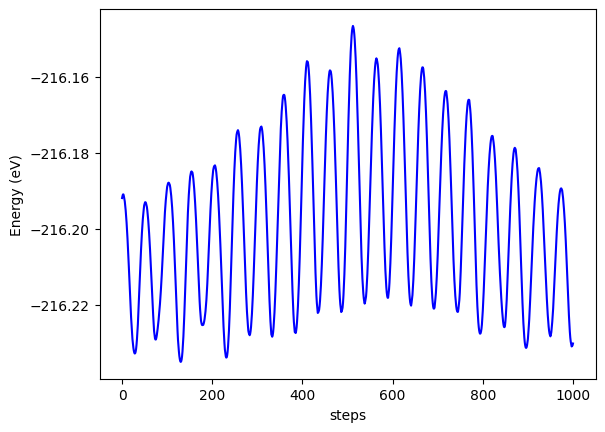

In [4]:
ETOT=[]
F=[]
time=[]
for i in range(dyn.get_number_of_steps()+1):
    ETOT.append(traj[i].get_total_energy())
    time.append(i)
    f=traj[i].get_forces()
    m=np.sum(np.linalg.norm(f, axis=1))
    F.append(m)
plt.plot(time, ETOT, label='ETOT', color='b')
plt.xlabel('steps')
plt.ylabel('Energy (eV)')

Text(0, 0.5, 'suma_atom(sqrt(fi^2))')

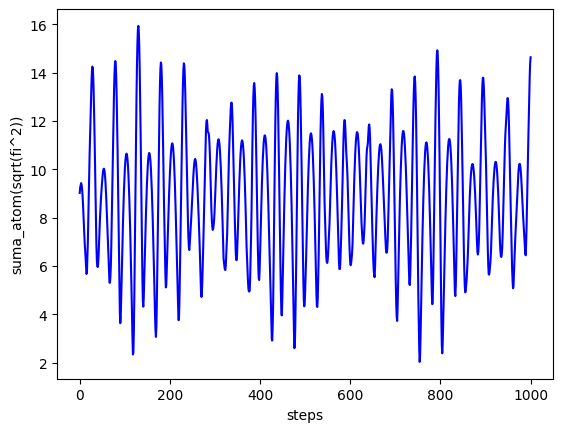

In [5]:
plt.plot(time, F, label='F', color='b')
plt.xlabel('steps')
plt.ylabel('suma_atom(sqrt(fi^2))')

Text(0, 0.5, 'Energy (eV)')

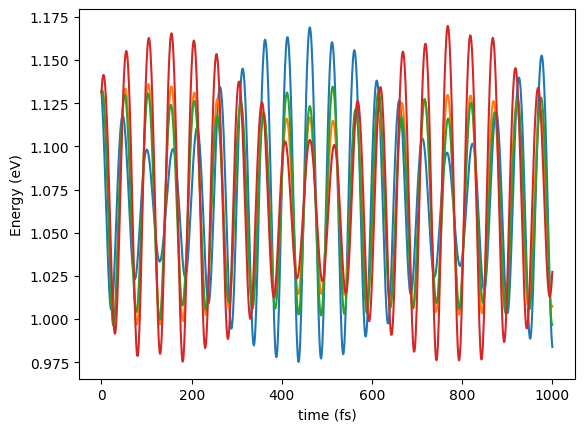

In [6]:
distances = []

index_atom1 = 0
index_atom2 = 1

for index_atom2 in [1,2,3,4]:
    aux=[]
    for frame in traj:
        pos_atom1 = frame[index_atom1].position
        pos_atom2 = frame[index_atom2].position
        d = np.linalg.norm(pos_atom1 - pos_atom2)
        aux.append(d)
    distances.append(aux)
    
for d in distances:
    plt.plot(time, d)
plt.xlabel('time (fs)')
plt.ylabel('Energy (eV)')

In [7]:
view(traj[1], viewer='x3d')

In [8]:
view(traj[-1], viewer='x3d')

ModuleNotFoundError: No module named 'nglview'